In [3]:
from typing import Annotated
from langgraph.graph import StateGraph, START, END
from langgraph.graph.message import add_messages
from dotenv import load_dotenv
from IPython.display import Image, display
import gradio as gr
from langgraph.graph import StateGraph
from langgraph.graph.message import add_messages
from langchain_openai import ChatOpenAI
from pydantic import BaseModel
import random

In [4]:
# Some useful constants

nouns = ["Cabbages", "Unicorns", "Toasters", "Penguins", "Bananas", "Zombies", "Rainbows", "Eels", "Pickles", "Muffins"]
adjectives = ["outrageous", "smelly", "pedantic", "existential", "moody", "sparkly", "untrustworthy", "sarcastic", "squishy", "haunted"]


In [5]:
load_dotenv(override=True)

True

In [6]:
def shout(text: Annotated[str, "something to be shouted"]) -> str:
    print(text.upper())
    return text.upper()

shout("hello")

HELLO


'HELLO'

#### 5 stages of langgraph

##### 1. Define the State object
##### 2. Start Graph Builder with State Class
##### 3. Add node
##### 4. Add Edge
##### 5. Compile the Graph

In [ ]:
# Step 1: Define the State object
class State(BaseModel):
    """State object for the LangGraph workflow.
        
        This class defines the state structure that will be passed between nodes
        in the graph, including a list of messages that can be accumulated.
        """
    messages: Annotated[list, add_messages]

In [10]:
# Step 2: Start Graph Builder with State Class
graph_builder = StateGraph(State)

In [11]:
# Step 3: Add node
def our_first_node(old_state: State) -> State:
    """Our first node function that generates a random silly message.
        
        Args:
            old_state: The current state object containing messages
            
        Returns:
            A new state object with a randomly generated message added
        """
    reply = f"{random.choice(nouns)} are {random.choice(adjectives)}"
    messages = [{"role": "assistant", "content": reply}]

    new_state = State(messages=messages)

    return new_state

graph_builder.add_node("first_node", our_first_node)

In [12]:
# Step 4: Create Edges
graph_builder.add_edge(START, "first_node")
graph_builder.add_edge("first_node", END)

In [13]:
# Step 5: Compile the Graph
graph = graph_builder.compile()

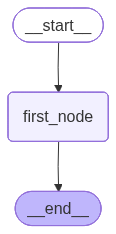

In [14]:
display(Image(graph.get_graph().draw_mermaid_png()))